# Data Cleaning
## Import Packages

In [1]:
from locale import D_FMT
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 20) # inc rows
pd.set_option('display.max_columns', None)  # disable column limits
pd.set_option('display.width', 1000)  # increase print width 
pd.set_option('display.precision', 3)  #decrease decimal digits

In [3]:
df = pd.read_excel("data/2018-22 test.xlsx", sheet_name=['2018-22 all','Felony codes'])

/var/folders/z1/fp4qwsq92v35jdsh7vrfmwt00000gn/T/ipykernel_85729/826140930.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel("data/2018-22 test.xlsx", sheet_name=['2018-22 all','Felony codes'])


In [4]:
raw_df= df.get('2018-22 all')

In [5]:
felony_codes=df.get('Felony codes')

In [6]:
felony_codes

,Time,Charge,Type,Felony?,date,date.1,date.2,date.3,charge,description,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2022-12-23 17:12:00,10/30/A,"LOTTERY TICKET, ALTER/FORGE/COUNTERFEIT c10 '30",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2006-02-16 13:02:00,10/30/A-0,"<00>, with intent to defraud, did falsely make...",NaN,NaN,NaN,NaN
1,2022-12-23 17:12:00,10/30/B,"LOTTERY TICKET, UTTER OR PASS FALSE c10 §30",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,10/30/B-0,"<00>, with intent to defraud, did utter or pas...",NaN,NaN,NaN,NaN
2,2022-12-23 17:12:00,10/30A/B,"STATE LOTTERY LICENSE/JOB, PROMISE c10 §30A",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,10/30A/B-0,<00> did promise or engage to secure a license...,NaN,NaN,NaN,NaN
3,2022-12-23 17:12:00,105/55,WAREHOUSE RECEIPT FOR UNRECEIVED GOODS c105 §55,F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,105/55-0,"<00>, being a warehouseman, or an officer, age...",NaN,NaN,NaN,NaN
4,2022-12-23 17:12:00,105/57,"WAREHOUSE RECEIPT, IMPROPER DUPLICATE c105 §57",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,105/57-0,"<00>, being a warehouseman, or an officer, age...",not being excepted by G.L. c.106,§7-601(1),in violation of G.L. c.105,"§57."""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,2022-12-23 17:12:00,94C/37,"DRUG, LARCENY OF c94C §37",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2010-06-30 15:06:00,94C/37-0,<00> did steal a controlled substance from a r...,NaN,NaN,NaN,NaN
1474,2022-12-23 17:12:00,94C/40/B,CONSPIRACY TO VIOLATE DRUG LAW FELONY c94C §40,F,1972-07-01,1999-12-31,2021-07-16 09:07:00,2021-07-16 09:07:00,94C/40/B-0,<00> did conspire with <01> to violate a provi...,NaN,NaN,NaN,NaN
1475,2022-12-23 17:12:00,COMLAW8,FORGERY (Common Law),F,2000-01-01,1999-12-31,2016-03-22 07:03:00,2016-03-22 07:03:00,COMLAW8-0,<00> did falsely make a written instrument for...,NaN,NaN,NaN,NaN
1476,2022-12-23 17:12:00,COMLAW9,UTTERING (Common Law),F,2000-01-01,1999-12-31,2016-03-22 07:03:00,2016-03-22 07:03:00,COMLAW9-0,<00> did knowingly utter a forged document wit...,NaN,NaN,NaN,NaN


In [7]:
raw_df['Case Status'].value_counts()

Closed                              153427
Open                                 28475
Default                               7915
Transferred                            283
ERROR-INVALID RPT DSPSTN ENTERED         2
Name: Case Status, dtype: int64

In [8]:
100.*raw_df['Case Status'].value_counts()/len(raw_df)

Closed                              80.708
Open                                14.979
Default                              4.164
Transferred                          0.149
ERROR-INVALID RPT DSPSTN ENTERED     0.001
Name: Case Status, dtype: float64

In [9]:
closed_only= raw_df.loc[raw_df['Case Status'] == 'Closed']

In [10]:
file_felony=closed_only['Filing Charge Code'].isin(felony_codes['Charge'])

In [11]:
disp_felony=closed_only['Disposition/Current Charge Code'].isin(felony_codes['Charge'])

In [12]:
closed_only['current felony?']=disp_felony

/var/folders/z1/fp4qwsq92v35jdsh7vrfmwt00000gn/T/ipykernel_85729/1273252015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_only['current felony?']=disp_felony


In [13]:
closed_felony= closed_only.loc[closed_only['current felony?'] == True]

In [14]:
closed_felony.dropna(subset = ['Imposed Dispositon Code'], inplace = True) 

/var/folders/z1/fp4qwsq92v35jdsh7vrfmwt00000gn/T/ipykernel_85729/2903823845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_felony.dropna(subset = ['Imposed Dispositon Code'], inplace = True)


In [15]:
dispositions = pd.read_excel("data/Dispositions.xlsx")

In [16]:
test2=pd.merge(closed_felony, dispositions, on="Imposed Dispositon Code")

In [17]:
test3=closed_felony.merge(dispositions,on="Imposed Dispositon Code")

In [18]:
len(closed_felony)

36151

In [19]:
len(test3)

36160

In [20]:
closed_felony['Disposition Category']=None

/var/folders/z1/fp4qwsq92v35jdsh7vrfmwt00000gn/T/ipykernel_85729/3972532982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_felony['Disposition Category']=None


In [21]:
closed_felony

,Case Number,Offense Date,Earliest Event Date,Court Location,Criminal Count Number,Filing Charge Code,Filing Charge Description,Disposition/Current Charge Code,Disposition/Current Charge Description,Charge/ Crime Type,Department Filing Charge,Way Charge Initiated,Defendant Race,Defendant Ethnicity,Defendant Gender,Name of Judge,Disposition Date,Imposed Dispositon Code,Imposed Disposition,Sentence Date,Sentence Type Imposed,Minimum Sentence Term Imposed,Minimum Suspended Term Imposed,Minimum Actual Term Imposed,Minimum Community Service Imposed,Maximum Sentence Term Imposed,Maximum Suspended Term Imposed,Maximum Actual Term Imposed,Maximum Community Service Imposed,Sentence Type Recmnd Code,Sentence Type Recommended,Minimum Sentence Term Recommended,Minimum Suspended Term Recommended,Minimum Actual Term Recommended,Minimum Community Service Recommended,Maximum Sentence Term Recommended,Maximum Suspended Term Recommended,Maximum Actual Term Recommended,Maximum Community Service Recommended,Jail Credit,Sentence Recommended,Sentence Imposed,Sentence Condition Recommended,Sentence Condition Imposed,Sentence Imposed Facility,Sentence Recommended Facility,Case Status,Sentence Start Date (Imp),Sentence Start Date (Rec),NPT/Stayed Until Date (Imp),NPT/Stayed Until Date (Rec),From And After Count (Imp),From And After Count (Rec),From And After State (Imp),From And After State (Rec),Restitution Amount (Imp),Restitution Amount (Rec),Fine Amount (Imposed),Fine Amount (Recommended),current felony?,Disposition Category
9,18-01-608360,1971-09-01 00:00:00,2018-01-12,Somerville District Court,1,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Larceny Other,MEDFORD,Arraigned,White,NaN,Male,"FLYNN, MAURICE",2018-01-12 00:00:00,CWF,CONTINUED W/O FINDING,NaN,Continued Without A Finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continued Without A Finding,NaN,STAY AWAY,Not Applicable,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,None
13,18-02-609802,1981-09-02 00:00:00,2018-03-20,Framingham District Court,1,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Larceny Other,FRAMINGHAM,Arraigned,White,Non-Hispanic/Non-Latino,Male,NaN,1918-06-19 00:00:00,DWO,DISMISSED W/O PREJUDICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,None
15,18-02-609802,1981-09-02 00:00:00,2018-03-20,Framingham District Court,3,265/13A/B,A&B c265 §13A,265/13A/B,A&B c265 §13A,Larceny Other,FRAMINGHAM,Arraigned,White,Non-Hispanic/Non-Latino,Male,NaN,2018-06-19 00:00:00,DWO,DISMISSED W/O PREJUDICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,None
16,18-10-629736,1981-10-14 00:00:00,2018-10-15,Framingham District Court,1,266/15/A,"BURGLARY, UNARMED c266 §15",266/16/A,B&E NIGHTTIME FOR FELONY c266 §16,Burglary/Unarmed,FRAMINGHAM,Arraigned,Black or African American,Not Provided,Male,"CUNIS, DAVID",2019-06-17 00:00:00,DWL,DISMISSED W/O PREJUDICE LACK OF PROSECUTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,None
17,18-10-629736,1981-10-14 00:00:00,2018-10-15,Framingham District Court,2,94C/32A/A,"COCAINE, DISTRIBUTE c94C §32A(c)",94C/32A/E,"DRUG, DISTRIBUTE CLASS B c94C §32A(a)",Burglary/Unarmed,FRAMINGHAM,Arraigned,Black or African American,Not Provided,Male,"CUNIS, DAVID",2019-06-17 00:00:00,DWL,DISMISSED W/O PREJUDICE LACK OF PROSECUTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [93]:
dispositions

,Imposed Dispositon Code,Disposition Category
0,GJT,Convicted
1,GCT,Convicted
2,GLF,Convicted
3,GTL,Convicted
4,DELB,Convicted
...,...,...
53,CWFL,Alternative
54,CWFJ,Alternative
55,PTPL,Alternative
56,GENC,postponed


In [103]:
all_felonies= closed_felony.merge(dispositions, on = 'Imposed Dispositon Code')


In [111]:
all_felonies=all_felonies.rename(columns={"Disposition Category_y": "Disposition Category"})

In [114]:
outcomes=all_felonies['Disposition Category'].value_counts()

In [115]:
outcomes

Acquitted or dismissed    23676
Plea Deal                  6360
Alternative                5600
Convicted                   447
postponed                    71
Remove                        6
Name: Disposition Category, dtype: int64

<AxesSubplot:ylabel='Disposition Category'>

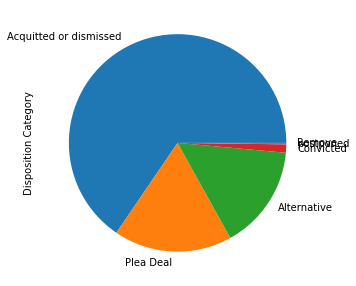

In [116]:
outcomes.plot.pie(figsize=(5, 5))